# **Lecture 15 - Reshaping and Merging Data**

---

<br>

### Packages

In [ ]:
# none! we will use base R

<br>

<br>

---

<br>

### Reshaping Data

* We recently learned how data can be stored in various file types (e.g., `.csv`, `.json`, etc.)

* If your data is in tabular form, it turns out you can organize your data in a variety of formats

* Two such formats that are commonly used are
  * Long format
  * Wide format

<br>

<br>

#### Long Format vs Wide Format?

* Imagine you are conducting a study on the blood pressure (systolic and diastolic) of set of patients

* You collect blood pressure measurements on each patient across up to three time points

* How would you format the data into a table?
  * Option 1: Each row is a single time point (multiple rows per patient)
  * Option 2: Each row is a single patient

<br>

Option 1:
* Let's load the following dataset on blood pressure



In [ ]:
# load blood pressure data
bp_long <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/blood_pressure_long.csv", header = TRUE)

# view first few lines
bp_long

Patient.ID,Time.Point,Systolic.BP,Diastolic.BP
<chr>,<chr>,<int>,<int>
P001,T1,168,109
P001,T2,151,73
P001,T3,169,71
P002,T1,124,75
P002,T2,171,73
P002,T3,171,98
P004,T1,164,79
P004,T3,112,83


* In the format above,
  * each row is populated with a single blood pressure measurement from a single time point
  * patients are included in multiple rows

* Collecting more time points would increase the number of rows in the dataset, making it a "longer" dataset

* Therefore, we refer to this format as ***long format***

<br>

Option 2:
* Let's load the same dataset on blood pressure but in a different format



In [ ]:
# load blood pressure data
bp_wide <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/blood_pressure_wide.csv", header = TRUE)

# view first few lines
bp_wide

Patient.ID,Systolic.BP.T1,Diastolic.BP.T1,Systolic.BP.T2,Diastolic.BP.T2,Systolic.BP.T3,Diastolic.BP.T3
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
P001,168,109,151,73,169,71
P002,124,75,NA,NA,171,98
P004,164,79,173,105,112,83


* In the format above,
  * each row is populated with a single patient
  * each row contains all repeated measurements (i.e. blood pressures across all time points)

* Collecting more time points would increase the number of columns in the dataset, making it a "wider" dataset

* Therefore, we refer to this format as ***wide format***

<br>

<br>

---

<br>

#### Converting from Long to Wide Format

* There are several packages that can be used to convert between long and wide formats
  * Base `R`
  * `tidyverse`
  * `data.table`
  * `janitor`

<br>

* We'll use the `reshape()` function already included in base `R`

<br>

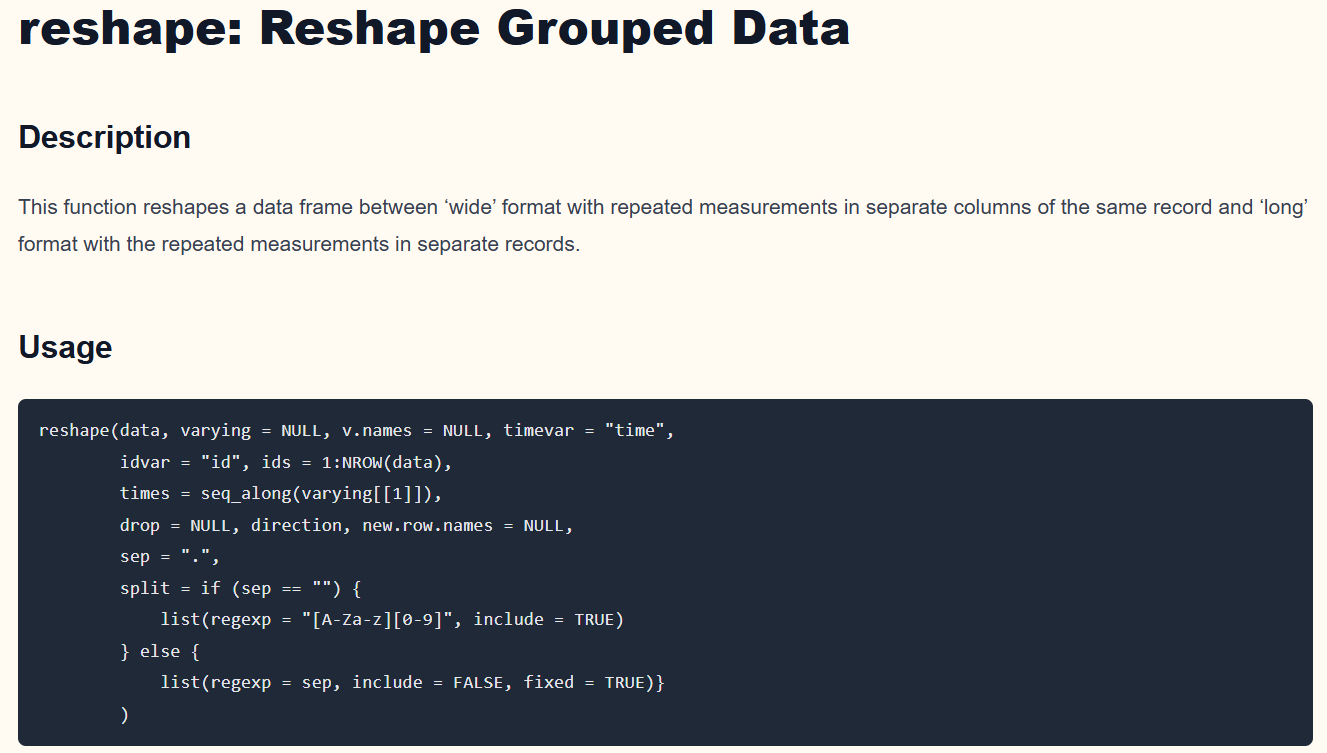

<br>

* To convert long to wide format, we must specify the following arguments in the `reshape()` function

  * `data` - Data frame you would like to convert to wide or long format

  * `timevar` - Repeated observation variable. This is often "time" but can be variable that characterizes the repeated measurement

  * `idvar` - Variable for which multiple observations are collected. This is often the patient ID in biomedical applications.

  * `direction` - set to `"wide"` to convert to wide format and `"long"` to convert to long format

<br>

In [ ]:
# view our data in long format
bp_long

Patient.ID,Time.Point,Systolic.BP,Diastolic.BP
<chr>,<chr>,<int>,<int>
P001,T1,168,109
P001,T2,151,73
P001,T3,169,71
P002,T1,124,75
P002,T2,171,73
P002,T3,171,98
P004,T1,164,79
P004,T3,112,83


<br>

In [ ]:
# convert long format to wide format using reshape
bp_wide <- reshape(data      = bp_long,
                   timevar   = "Time.Point",
                   idvar     = "Patient.ID",
                   direction = "wide")

# verify output
bp_wide

,Patient.ID,Systolic.BP,Diastolic.BP.T1,Diastolic.BP.T2,Diastolic.BP.T3
,<chr>,<int>,<int>,<int>,<int>
1,P001,168,109,NA,NA
2,P001,151,NA,73,NA
3,P001,169,NA,NA,71
4,P002,124,75,NA,NA
5,P002,171,NA,73,98
7,P004,164,79,NA,NA
8,P004,112,NA,NA,83


<br>

#### Converting from Wide to Long Format

* The syntax for converting from wide to long format is a bit more difficult since we need to specify more arguments

<br>

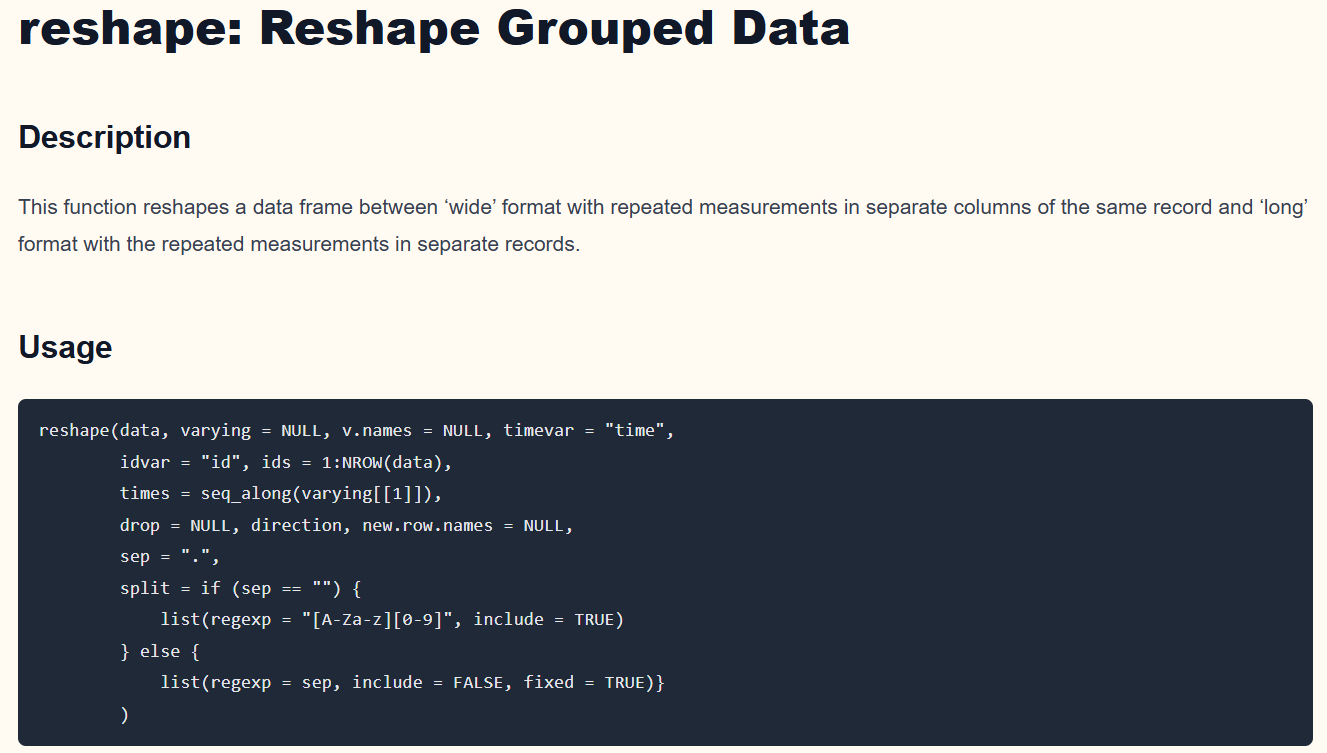

<br>

* To convert wide to long format, we must specify the following arguments in the `reshape()` function

  * `data` - Data frame you would like to convert to wide or long format

  * `varying` - Specifies the columns that we need to be combined into long format

  * `idvar` - Variable for which multiple observations are collected. This is often the patient ID in biomedical applications.

  * `v.names` - Names for the resulting value columns (Systolic and Diastolic)

  * `timevar` - The name of the column for time points

  * `times` - The labels for the time points

  * `direction` - Set to `"wide"` to convert to wide format and `"long"` to convert to long format

<br>

In [ ]:
# view our data in wide format
bp_wide

<br>

In [ ]:
# convert long format to wide format using reshape
bp_long <- reshape(data      = bp_wide,
                   varying   = list(Systolic = names(bp_wide)[c(2, 4, 6)],
                                    Diastolic = names(bp_wide)[c(3, 5, 7)]),
                   idvar     = "Patient.ID",
                   v.names   = c("Systolic", "Diastolic"),
                   timevar   = "Time.Point",
                   times     = c("T1", "T2", "T3"),
                   direction = "long")

# verify format
bp_long

<br>

* The `reshape()` function tends to provide verbose row names, but we know how to remove them!

In [ ]:
# we can reorder by patient, then time
bp_long <- bp_long[order(bp_long$Patient.ID, bp_long$Time.Point),]

# remove rownames produced by the reshape() function
rownames(bp_long) <- NULL

# view our data in long format
bp_long

<br>

<br>

---

<br>

#### When to use Long vs Wide Format?

* When to use long format?
  * The majority of the time, we want our data in long format

  * Most functions for statistical modeling and data visualization require data to be in long format

  * Long format is more appropriate when each individual has varying numbers of repeated observations

<br>

* When to use wide format?
  * Wide format is more efficient for data storage

  * Wide format is more efficient for data summaries

  * Wide format is more appropriate when each individual has an equal number of observations

<br>

<br>

---

<br>

### Merging Data using Joins

* In data science, we often analyze data from different sources

* This requires us to combine/merge/join the data into a single data frame


<br>

* To merge or join datasets is to combine the rows from `x` and `y` based on values in a common variable, also known as a "key"

* There are a variety of ways to join datasets

* We will cover the four most common

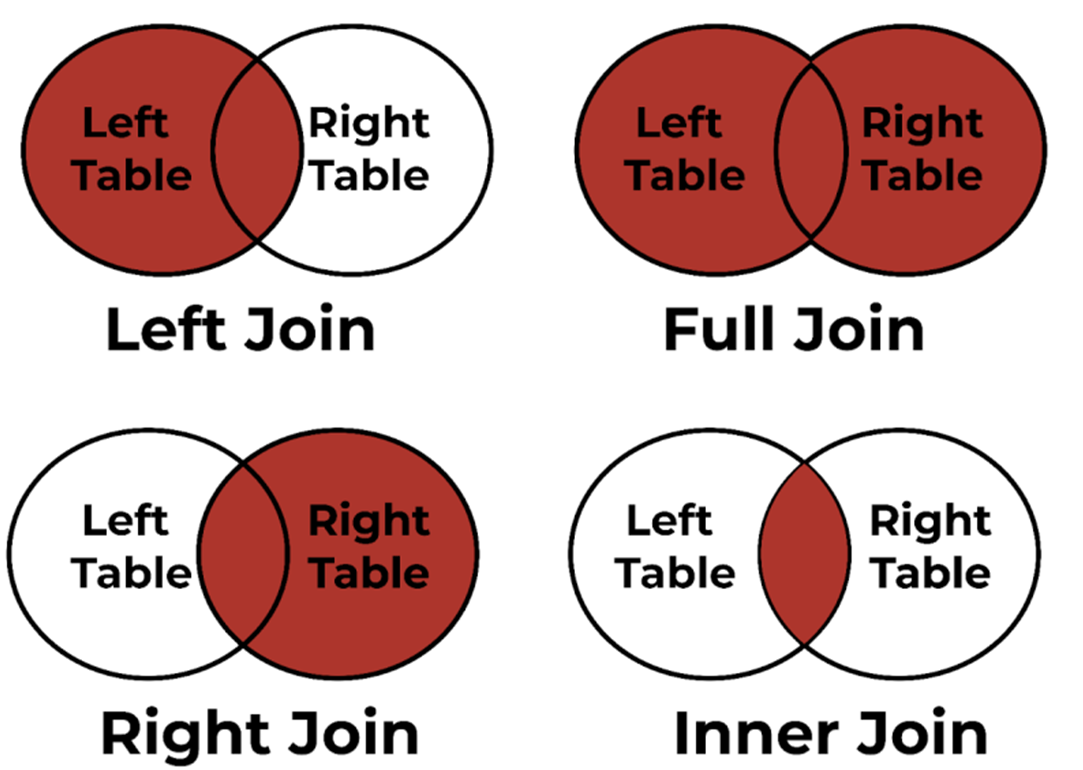

<br>

* In base `R`, the function `merge()` allows us to perform these join operations

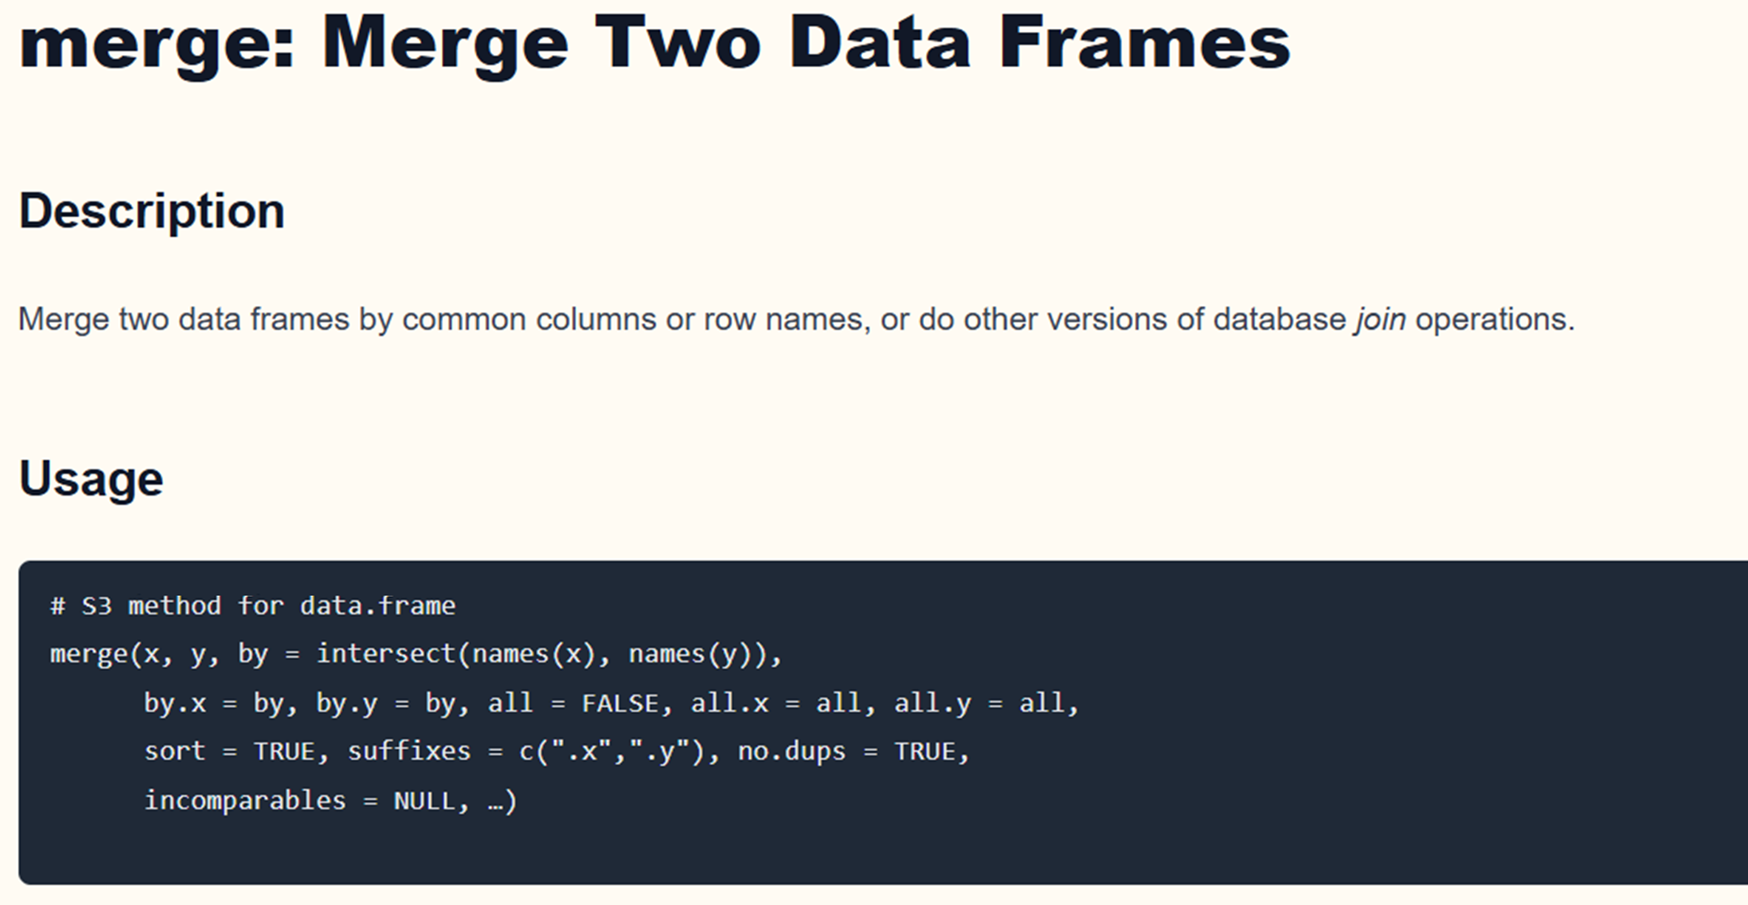

<br>

* To join or merge two datasets, we must specify the following arguments in the `merge()` function

  * `x` - The left data frame in the merge

  * `y` - The right data frame in the merge

  * `by.x` - Column in data frame `x` used in the merge

  * `by.y` - Column in data frame `y` used in the merge

  * `all.x` - if `TRUE`, keep all data from data frame `x`; default is `FALSE`

  * `all.y` - if `TRUE`, keep all data from data frame `y`; default is `FALSE`

<br>

<br>

#### Inner joins

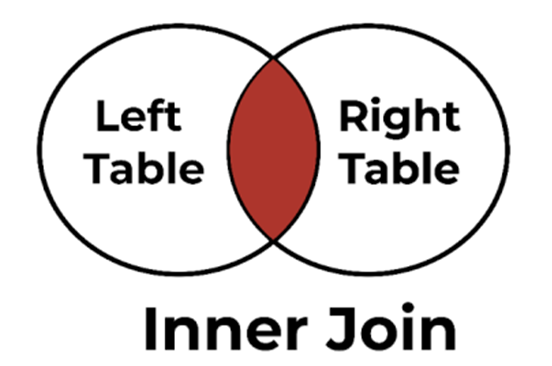

<br>

* Consider two data frames `x` (left) and `y` (right)

* Inner Join - Combines the rows between `x` and `y` based on values in a common variable
  * If values in the common variable are not in both `x` and `y`, their data are excluded

<br>

* For example, let's perform an inner join to merge the following two datasets

  * Blood pressure
  * Demographics

In [ ]:
# load blood pressure data
bp   <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/blood_pressure_long.csv", header = TRUE)

# load demographics data
demo <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/patient_demographics.csv", header = TRUE)

<br>

In [ ]:
# blood pressure data
bp

In [ ]:
# demographics data
demo

<br>

* The inner join is performed using the script below

* Since patient 002 and patient 003 are NOT in both data frames, their data is excluded

In [ ]:
# inner join using merge() function
bp_inner <- merge(x     = bp,
                  y     = demo,
                  by.x  = "Patient.ID",
                  by.y  = "id",
                  all.x = FALSE,
                  all.y = FALSE)

In [ ]:
bp_inner

<br>

<br>

#### Left joins

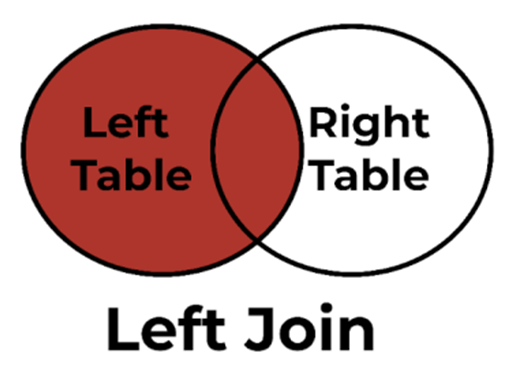

<br>

* Consider two data frames `x` (left) and `y` (right)

* Left Join - Combines the rows between `x` and `y` based on values in a common variable
  * If values in the common variable are in `y` but not `x`, their data are excluded
  * If values in the common variable are in `x` but not `y`, their data are still included

<br>

* For example, let's perform an left join to merge the following two datasets

  * Blood pressure
  * Demographics

<br>

In [ ]:
# blood pressure data
bp

In [ ]:
# demographics data
demo

In [ ]:
merged <- merge(x     = gdp,
                y     = population,
                by.x  = "country",
                by.y  = "country",
                all.x = FALSE,
                all.y = FALSE)

In [ ]:
merged <- merge(x     = gdp,
                y     = population,
                by.x  = "country",
                by.y  = "country",
                all.x = TRUE,
                all.y = FALSE)

In [ ]:
merged <- merge(x     = gdp,
                y     = population,
                by.x  = "country",
                by.y  = "country",
                all.x = FALSE,
                all.y = TRUE)

In [ ]:
merged <- merge(x     = gdp,
                y     = population,
                by.x  = "country",
                by.y  = "country",
                all.x = TRUE,
                all.y = TRUE)

<br>

* The left join is performed using the script below

* Since patient 003 is only in the "right" data frame, their data is excluded

* Since patient 002 is only in the "left" data frame, their data is included, but they have no demographic information

In [ ]:
# inner join using merge() function
bp_left <- merge( x     = bp,
                  y     = demo,
                  by.x  = "Patient.ID",
                  by.y  = "id",
                  all.x = TRUE,  # left join
                  all.y = FALSE)

In [ ]:
bp_left

<br>

<br>

#### Right joins

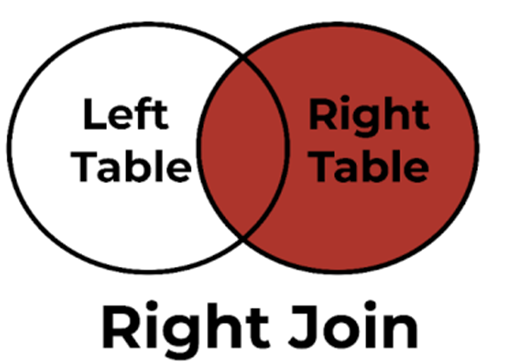

<br>

* Consider two data frames `x` (left) and `y` (right)

* Right Join - Combines the rows between `x` and `y` based on values in a common variable
  * If values in the common variable are in `x` but not `y`, their data are excluded
  * If values in the common variable are in `y` but not `x`, their data are still included

<br>

* For example, let's perform an right join to merge the following two datasets

  * Blood pressure
  * Demographics

<br>

In [ ]:
# blood pressure data
bp

In [ ]:
# demographics data
demo

<br>

* The right join is performed using the script below

* Since patient 002 is only in the "left" data frame, their data is excluded

* Since patient 003 is only in the "right" data frame, their data is included, but they have no blood pressure information

In [ ]:
# inner join using merge() function
bp_right <- merge(x     = bp,
                  y     = demo,
                  by.x  = "Patient.ID",
                  by.y  = "id",
                  all.x = FALSE,
                  all.y = TRUE)   # right join

In [ ]:
bp_right

<br>

<br>

#### Full joins

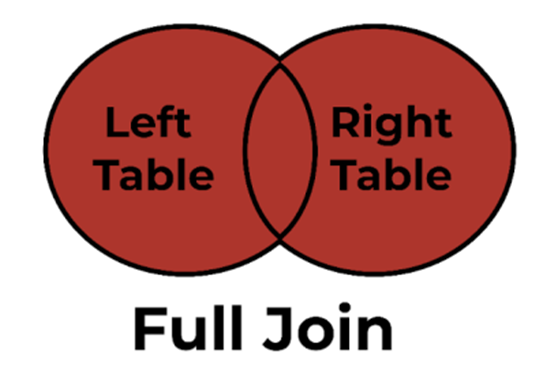

<br>

* Consider two data frames `x` (left) and `y` (right)

* Full Join - Combines the rows between `x` and `y` based on values in a common variable
  * If values in the common variable are in `x` but not `y`, their data are still included
  * If values in the common variable are in `y` but not `x`, their data are still included

<br>

* For example, let's perform an full join to merge the following two datasets

  * Blood pressure
  * Demographics

<br>

In [ ]:
# blood pressure data
bp

In [ ]:
# demographics data
demo

<br>

* The full join is performed using the script below

* Since patient 002 is only in the "left" data frame, their data is included, but they have no demographic information

* Since patient 003 is only in the "right" data frame, their data is included, but they have no blood pressure information

In [ ]:
# inner join using merge() function
bp_full <- merge(x     = bp,
                 y     = demo,
                 by.x  = "Patient.ID",
                 by.y  = "id",
                 all.x = TRUE,
                 all.y = TRUE)

In [ ]:
bp_full

<br>

<br>

### Why are joins important?

* Merges/joins enable you study relationships in data from different sources

* For example, we can use the results of a join to visualize the relationship between blood pressure and sex at birth

* We'll do this a bit differently from above to show variations of what we've covered



<br>

* Load the dataset

In [ ]:
# load blood pressure data
bp   <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/blood_pressure_wide.csv", header = TRUE)

# load demographics data
demo <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/patient_demographics.csv", header = TRUE)

In [ ]:
bp

In [ ]:
demo

<br>

* Merge the blood pressure data and demographic data

* Since we want all information from both datasets, we will use a full join

In [ ]:
# merge using a full join
bp_full <- merge(x     = bp,
                 y     = demo,
                 by.x  = "Patient.ID",
                 by.y  = "id",
                 all.x = TRUE,
                 all.y = TRUE)

In [ ]:
# check our work
bp_full

<br>

* Notice that we merged the data in wide format, which is fine

* We can convert the data to long format using the `reshape()` function

In [ ]:
# convert the data from wide to long format
bp_long <- reshape(data      = bp_full,
                   varying   = list(Systolic = names(bp_wide)[c(2, 4, 6)],
                                    Diastolic = names(bp_wide)[c(3, 5, 7)]),
                   idvar     = "Patient.ID",
                   v.names   = c("Systolic", "Diastolic"),
                   timevar   = "Time.Point",
                   times     = c("T1", "T2", "T3"),
                   direction = "long"
)

In [ ]:
# check our work
bp_long

<br>

* Reorganizing the data

In [ ]:
# we can reorder by patient, then time
bp_long <- bp_long[order(bp_long$Patient.ID, bp_long$Time.Point),]

# remove rownames produced by the reshape() function
rownames(bp_long) <- NULL

# view our data in long format
bp_long

In [ ]:
# if you want to reorganize columns
bp_long <- bp_long[, c("Patient.ID", "Time.Point", "Systolic", "Diastolic",
                       "Age", "Sex", "Ethnicity")]

bp_long

<br>

* Perform our data analysis!

* Note this is an example and we would need a larger sample size to come up with conclusions!

In [ ]:
# explore our merged data set using visualization
boxplot(bp_long$Systolic ~ bp_long$Sex,
        main = "Systolic Blood Pressure by Sex",
        xlab = "Sex",
        ylab = "Systolic BP")

<br>

<br>